In [1]:
#import the libraries
import pandas as pd
import numpy as np

# CHECKPOINT 1
## Data Cleaning 

In [2]:
#Importing campanies.csv file as campanies dataset
companies=pd.read_csv('companies.csv', engine='python')
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [4]:
#checking if there are any dublicate values in permalink column
a=companies['permalink']
b = a.value_counts()
(b>2).sum()

0

In [5]:
#first converting all the values to lower cast and getting the total uniqu values
companies['permalink'] = companies['permalink'].str.lower()
print(len(companies['permalink'].unique()))

66368


In [6]:
#Importing rounds2.csv file as rounds2 dataset
rounds2 = pd.read_csv("rounds2.csv", engine='python')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
#checking if there are any dublicate values in permalink column
a=rounds2['company_permalink'].str.lower()
b = a.value_counts()
(b>2).sum()

11531

In [8]:
rounds2['company_permalink'].str.lower().describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [9]:
#first converting all the values to lower cast and getting the total uniqu values
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
print(len(rounds2['company_permalink'].unique()))

66368


In [10]:
#checing if there any companies in the rounds2 file which are not present in companies
check1 = pd.DataFrame(rounds2.company_permalink.unique())
check2 = pd.DataFrame(companies.permalink.unique())
check2.equals(check1)

True

In [11]:
#merging both the dataset and naming the new one as master_frame
master_frame = pd.merge(rounds2, companies, left_on = 'company_permalink', right_on = 'permalink')


In [12]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [13]:
#getting the sum of null values in each columns
master_frame.isnull().sum(axis=0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [14]:
#droping the columns which are not required
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [15]:
master_frame.head()


,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN


In [16]:
master_frame.isnull().sum(axis=0)

company_permalink         0
funding_round_type        0
raised_amount_usd     19990
name                      1
category_list          3410
country_code           8678
dtype: int64

In [17]:
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
country_code           7.55
dtype: float64


In [18]:
#removing the rows which have null values
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                             master_frame['category_list'].isnull())]

In [19]:
master_frame['company_permalink'].str.lower().describe()

count                        88529
unique                       48730
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [20]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
6,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,HKG
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN


# Checkpoints 2
## Funding Type Analysis

In [21]:
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [22]:
#droping the rows other than the four which are needed
master_frame = master_frame[master_frame.funding_round_type.isin(['venture', 'seed', 'angel', 'private_equity'])]
master_frame1 = master_frame

In [23]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [24]:
#calculating average investment amount for each of the four types.

temp1 = round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2)
temp1

funding_round_type
angel               971573.89
private_equity    73938486.28
seed                747793.68
venture           11724222.69
Name: raised_amount_usd, dtype: float64

In [25]:
#droping all the other rows except venture type. As Spark Funds wants to invest between 5 to 15 million USD
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 

In [26]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47809 entries, 0 to 114941
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   47809 non-null  object 
 1   funding_round_type  47809 non-null  object 
 2   raised_amount_usd   47809 non-null  float64
 3   name                47809 non-null  object 
 4   category_list       47809 non-null  object 
 5   country_code        47809 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.6+ MB


# Checkpoints 3
## Country Analysis

In [27]:
# top 9 countries with the highest funding   
top9 = pd.DataFrame(master_frame.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending = False).head(n=9))
top9.reset_index(inplace=True)

In [28]:
top9

,country_code,raised_amount_usd
0,USA,4.200680e+11
1,CHN,3.933892e+10
2,GBR,2.007281e+10
3,IND,1.426151e+10
4,CAN,9.482218e+09
5,FRA,7.226851e+09
6,ISR,6.854350e+09
7,DEU,6.306922e+09
8,JPN,3.167647e+09


In [29]:
#keeping only the top 3 english speaking countries and removing the rest.
master_frame = master_frame[(master_frame['country_code'] == 'USA') | (master_frame['country_code'] == 'GBR') | (master_frame['country_code'] == 'IND')]

In [30]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA
22,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,USA


# Checkpoint 4
## Sector Analysis 1

In [31]:
#Extracting the primary vector value
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [32]:
master_frame.head()


,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA,Analytics
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA,Analytics
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA,Analytics
22,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,USA,Apps


In [33]:
mapping = pd.read_csv('mapping.csv')
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)


In [34]:
# Making a new columb called main_sector 
mapping['main_sector'] = mapping[['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising']].idxmax(axis=1)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [35]:
# droping all the columns which are not required and the blanks rows aswell
mapping = mapping[["category_list", "main_sector"]]
mapping = mapping[~(mapping.main_sector == 'Blanks')]
mapping = mapping.rename({'category_list': 'primary_sector'}, axis=1) 
mapping.head()

,primary_sector,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health


In [36]:
mapping.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   primary_sector  687 non-null    object
 1   main_sector     687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [37]:
# merging the mapping.csv and master_frame 
master_frame = pd.merge(master_frame,mapping,how='inner',left_on='primary_sector',right_on='primary_sector')
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media,Entertainment
1,/organization/90min,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
2,/organization/90min,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
3,/organization/90min,venture,18000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
4,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,USA,Media,Entertainment


# Checkpoint 5
## Sector Analysis 2

In [38]:
# making 3 different dataframe based on the top 3 english speaking country
D1 = master_frame[(master_frame['country_code'] == 'USA') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
D2 = master_frame[(master_frame['country_code'] == 'GBR') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
D3 = master_frame[(master_frame['country_code'] == 'IND') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]

In [39]:
#Total number of investments of top 3 countries resectively
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12012
619
328


In [40]:
#Total amount of investment of top 3 countries resectively
print(round(D1.raised_amount_usd.sum()))
print(round(D2.raised_amount_usd.sum()))
print(round(D3.raised_amount_usd.sum()))

107318294664
5365228300
2949543602


In [41]:
#Total number of investments for Country1
D1.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(3)


main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
Name: main_sector, dtype: int64

In [42]:
#Total number of investments for Country2
D2.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(3)


main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
Name: main_sector, dtype: int64

In [43]:
#Total number of investments for Country3
D3.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(3)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: main_sector, dtype: int64

In [44]:
# for usa
# company received the highest investment for the top sector
company = D1[D1['main_sector']=='Others']
print(company.groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))

# company received the highest investment for the second top sector
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
print(company.groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))


company_permalink
/organization/virtustream    64300000.0
Name: raised_amount_usd, dtype: float64
company_permalink
/organization/shotspotter    67933006.0
Name: raised_amount_usd, dtype: float64


In [45]:
# for gbr
# company received the highest investment for the top sector
company = D2[D2['main_sector']=='Others']
print(company.groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))

# company received the highest investment for the second top sector
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
print(company.groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))

company_permalink
/organization/electric-cloud    37000000.0
Name: raised_amount_usd, dtype: float64
company_permalink
/organization/celltick-technologies    37500000.0
Name: raised_amount_usd, dtype: float64


In [46]:
# for gbr
# company received the highest investment for the top sector
company = D3[D3['main_sector']=='Others']
print(company.groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))

# company received the highest investment for the second top sector
company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
print(company.groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))

company_permalink
/organization/firstcry-com    39000000.0
Name: raised_amount_usd, dtype: float64
company_permalink
/organization/manthan-systems    50700000.0
Name: raised_amount_usd, dtype: float64


# Checkpoint 6: Plots

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

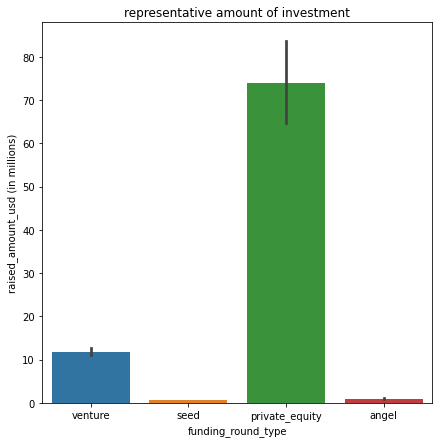

In [48]:
# A plot showing the representative amount of investment in each funding type.
plt.figure(figsize=[7.0,7.0])
sns.barplot(x=master_frame1['funding_round_type'],y=master_frame1['raised_amount_usd']/1000000,estimator=np.mean)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("representative amount of investment") 
plt.show()

In [49]:
# top 3 english speaking countries
top9['top3eng']= top9["country_code"].isin(["USA","GBR","IND"])

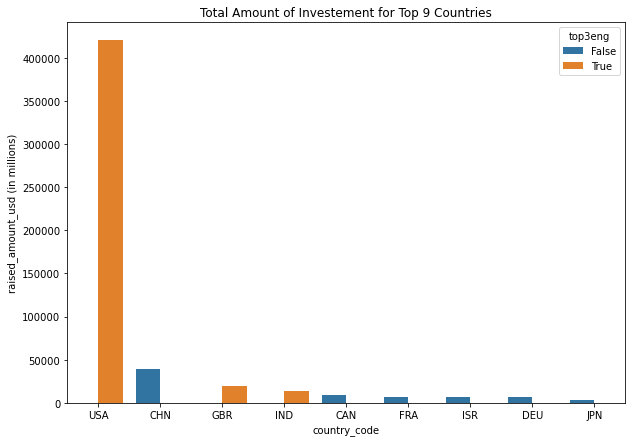

In [50]:
# A plot showing the top 9 countries against the total amount of investments of funding type FT.
plt.figure(figsize=[10.0,7.0])
sns.barplot(x=top9['country_code'],y=top9['raised_amount_usd']/1000000,hue=top9["top3eng"],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Total Amount of Investement for Top 9 Countries") 
plt.show()

In [51]:
usa=pd.DataFrame(D1.groupby(by='main_sector')['main_sector'].count().rename('Total_Investment_Count').sort_values(ascending = False).head(3))
usa['country_code'] = 'USA'
gbr=pd.DataFrame(D2.groupby(by='main_sector')['main_sector'].count().rename('Total_Investment_Count').sort_values(ascending = False).head(3))
gbr['country_code'] = 'GBR'
ind=pd.DataFrame(D3.groupby(by='main_sector')['main_sector'].count().rename('Total_Investment_Count').sort_values(ascending = False).head(3))
ind['country_code'] = 'IND'

In [52]:
usa.reset_index(inplace=True)
gbr.reset_index(inplace=True)
ind.reset_index(inplace=True)

In [53]:
result=pd.merge(pd.merge(usa,gbr,how='outer'),ind,how='outer')
result.head(n=10)

,main_sector,Total_Investment_Count,country_code
0,Others,2950,USA
1,"Social, Finance, Analytics, Advertising",2714,USA
2,Cleantech / Semiconductors,2300,USA
3,Others,147,GBR
4,"Social, Finance, Analytics, Advertising",133,GBR
5,Cleantech / Semiconductors,128,GBR
6,Others,110,IND
7,"Social, Finance, Analytics, Advertising",60,IND
8,"News, Search and Messaging",52,IND


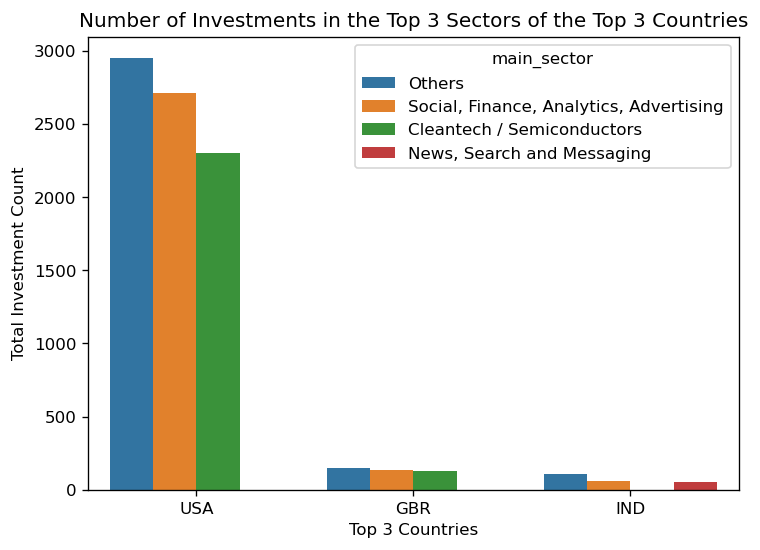

In [54]:
# A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
plt.figure(figsize=[7.0,5.0],dpi=120,frameon=True)
sns.barplot(x='country_code', y='Total_Investment_Count', hue='main_sector',data=result)
plt.ylabel("Total Investment Count")
plt.xlabel("Top 3 Countries")
plt.title("Number of Investments in the Top 3 Sectors of the Top 3 Countries") 
plt.show()